## Import Data

In [27]:
# Import helper functions
# for file/directory operations
import os
import random
# for file copying/moving
import shutil

# Function to split directory into train, test and validation sets
# Default split is 80% train 20% validation
# Directory structure should be: directory/class_name/file_name.jpg
def split_dir_to_train_val(directory: str,
                            train_size:float = 0.8,
                            val_size:float = 0.2):

    """
    before split
    directory/
        ├─ 000/
        │   ├─ a.png
        │   └─ ...
        ├─ 001/
        │   └─ ...
        ...
    after split
    noise/
        ├─ train/
        │   ├─ 000/
        │   └─ 001/
        └─ val/
            ├─ 000/
            └─ 001/
    """

    # Set random seeds
    if abs(train_size+val_size-1) > 1e-6:
        raise ValueError(
            "train_size + val_size should be equal to 1.0. "
            f"train_size: {train_size}, val_size: {val_size}"
        )

    seed = 42
    rng = random.Random(seed)


    for root, folders, files in os.walk(directory):
        for folder in folders:
            # Create list of the files
            folder_path = os.path.join(root, folder)
            list_of_files = os.listdir(folder_path)
            list_of_files = [os.path.join(folder_path, f) for f in list_of_files] # here f is the image file

            #  Shuffle the list
            rng.shuffle(list_of_files)

            # Create lists of files
            train_files = list_of_files[:int(len(list_of_files)*train_size)]
            # we put first 80% files as train_files

            val_files = list_of_files[int(len(list_of_files)*(val_size)):]

            # Create folders and files for train data
            for one_file in train_files:

            # Copy  files
                dest_dir = "noise/train/"+folder+"/"
                os.makedirs(dest_dir, exist_ok=True)

                shutil.copy2(src=(one_file),
                             dst=(dest_dir+one_file))
            print(f"Folder {folder}. Train data copied. {len(train_files)} files")

            # Create folders and files for validation data
            for one_file in val_files:

                # Copy  files
                dest_dir = "noise/validation/"+folder+"/"
                os.makedirs(dest_dir, exist_ok=True)

                shutil.copy2(src=(root+folder+"/"+one_file),
                             dst=(dest_dir+one_file))
            print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

def get_class_names_from_folder(directory):
    import pathlib
    import numpy as np
    data_dir = pathlib.Path(directory)
    class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
    return class_names

In [28]:
# Split images dir to train, test and validation
split_dir_to_train_val(directory="data/tsrd-train20.0/",
                            train_size=0.8,
                            val_size=0.2)

FileNotFoundError: [Errno 2] No such file or directory: 'noise/train/054/data/tsrd-train20.0/054/054_1_0134.png'

## Explore and visualize the data

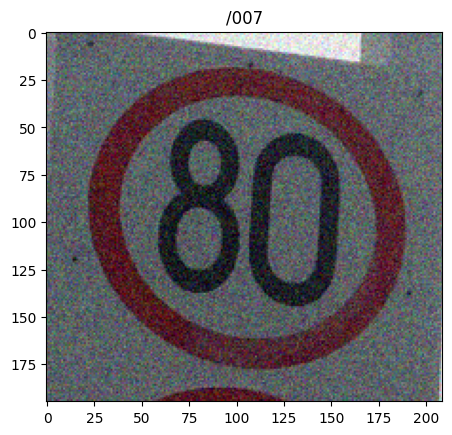

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("data/tsrd-train20.0", "/007")

## Create and fit the model

Found 1695 images belonging to 10 classes.
Found 1703 images belonging to 10 classes.
Found 772 images belonging to 10 classes.


/Users/sky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 117, 117, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 58, 58, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       538,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,018 (2.06 MB)

 Trainable params: 541,018 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

1695
1703
52
53


/Users/sky/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.4009 - loss: 2.1774 - val_accuracy: 0.8821 - val_loss: 0.3272
Epoch 2/8
 1/52 ━━━━━━━━━━━━━━━━━━━━ 13s 261ms/step - accuracy: 1.0000 - loss: 0.1126

/Users/sky/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 0.1126 - val_accuracy: 0.8939 - val_loss: 0.3135
Epoch 3/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.9085 - loss: 0.2604 - val_accuracy: 0.9658 - val_loss: 0.1220
Epoch 4/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9355 - loss: 0.1130 - val_accuracy: 0.9664 - val_loss: 0.1184
Epoch 5/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.9673 - loss: 0.0977 - val_accuracy: 0.9817 - val_loss: 0.0611
Epoch 6/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 0.9711 - val_loss: 0.0873
Epoch 7/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.9820 - loss: 0.0629 - val_accuracy: 0.9640 - val_loss: 0.1027
Epoch 8/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 1.0000 - loss: 0.0477 - val_accuracy: 0.9658 - val_loss: 0.0973
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7415 - loss: 1.1142


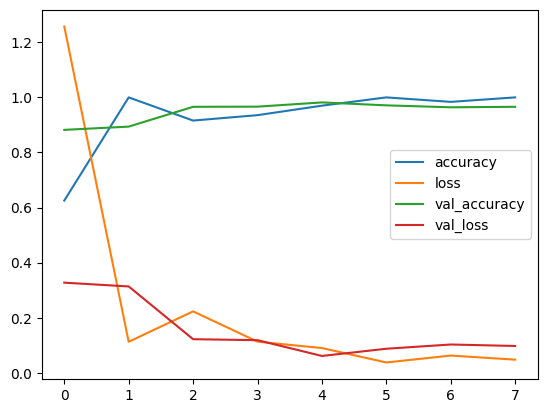

In [3]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="noise/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="noise/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")


test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = test_datagen.flow_from_directory(directory="data/filtered-tsrd-test20.0",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

"""## Create and fit the model"""


# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])




# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

model.summary()

# Fit the model

batch_sizes = 32
epoch = 8
trainsteps = (train_data.n//batch_sizes)
valsteps = (validation_data.n//batch_sizes)
print(train_data.n)
print(validation_data.n)
print(trainsteps)
print(valsteps)
print(train_data)

history = model.fit(train_data,
                    batch_size=batch_sizes,
                    epochs=epoch,
                    steps_per_epoch=trainsteps,
                    validation_data=validation_data,
                    validation_steps=valsteps)


# Evaluate model

model.evaluate(test_data)

import pandas as pd

pd.DataFrame(history.history).plot()

model.save('noise_model.keras')



In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_model = tf.keras.models.load_model('noise_model.keras')

image_path = 'data/filtered-tsrd-test/003/003_1_0001_1_j.png'  # Replace with the actual image path
image = load_img(image_path, target_size=(240, 240))
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


# Make predictions using the loaded model
predictions = new_model.predict(image_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the confidence for the predicted class
confidence = predictions[0][predicted_class_index] * 100  # Convert to percentage

# Print the predicted class index and corresponding class label
print('Predicted Class Index:', predicted_class_index)

# Assuming you have a list of class labels
class_labels = ['003','005','007','011','016','028','030','035','054','055']  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]
print('Predicted Class Label:', predicted_class_label)
print('Prediction Confidence (%):', confidence)

# Get softmax values for all categories
softmax_output = tf.nn.softmax(predictions)

# Convert softmax output to a numpy array for easier manipulation
softmax_values = softmax_output.numpy()

# Print softmax values for all categories
print(softmax_values)
print(softmax_values[0][predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class Index: 0
Predicted Class Label: 003
Prediction Confidence (%): 99.98586177825928
[[0.23194133 0.085343   0.08533921 0.08534244 0.08534144 0.08533851
  0.08533851 0.08533851 0.08533851 0.08533853]]
0.23194133


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_model = tf.keras.models.load_model('noise_model.keras')
new_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       538,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,623,056 (6.19 MB)

 Trainable params: 541,018 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,082,038 (4.13 MB)